In [68]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn import metrics

##### Questao 1

2.0
3.0


(array([1., 3., 0., 0., 0., 1., 2., 0., 2., 1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

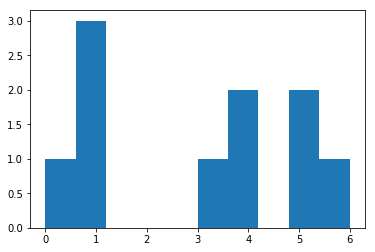

In [43]:
X = [3, 4, 1, 0, 1, 5, 5, 6, 1,4]

print(np.std(X))

print(np.mean(X))

plt.hist(X,bins=10)


### Questao 2 

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([24.34519417, 24.3602427 , 24.37529123, ..., 99.55773302,
        99.57278155, 99.58783007]),
 <a list of 5000 Patch objects>)

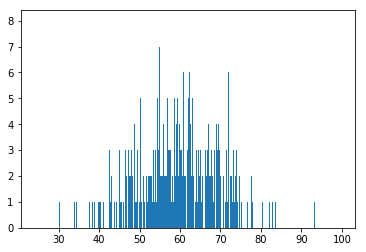

In [46]:
normal = np.random.normal(loc=60.0, scale=10.0, size=5000)

plt.hist(normal,bins=5000)

### Questão 3

(array([2966., 1011.,  586.,  230.,  125.,   40.,   25.,    8.,    6.,
           3.]),
 array([ 1. ,  4.5,  8. , 11.5, 15. , 18.5, 22. , 25.5, 29. , 32.5, 36. ]),
 <a list of 10 Patch objects>)

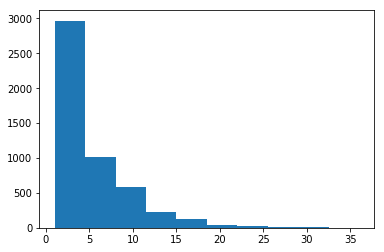

In [48]:
# distribuiçao geometrica
geometrica = np.random.geometric(0.2, size=5000)
plt.hist(geometrica)


(array([3260.,    0.,    0.,    0.,    0., 1558.,    0.,    0.,    0.,
         182.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

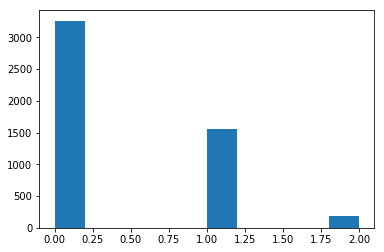

In [53]:
binomial =np.random.binomial(2,0.2 ,size=5000)
plt.hist(binomial)


In [55]:
def compute_error_for_line_given_points(b0, b1, x, y):
    N = len(y)
    totalError = 1/N * np.sum((y - (b1 * x + b0)) ** 2)
    return totalError

def step_gradient(b0_current, b1_current, x, y, learning_rate):
    N = len(y)
    b0_gradient = 2/N * np.sum(-(y - ((b1_current * x) + b0_current)))
    b1_gradient = 2/N * np.sum(-x * (y - ((b1_current * x) + b0_current)))
    new_b0 = b0_current - (learning_rate * b0_gradient)
    new_b1 = b1_current - (learning_rate * b1_gradient)
    return new_b0, new_b1

def gradient_descent_runner(x, y, b0, b1, learning_rate, epoch):
    for _ in range(epoch):
        b0, b1 = step_gradient(b0, b1, x, y, learning_rate)
    return b0, b1

def run(x, y, initial_b0, initial_b1, learning_rate, num_iterations):
    print("Inicia com b0 = {}, b1 = {}, error = {}".format(initial_b0, initial_b1, compute_error_for_line_given_points(initial_b0, initial_b1, x, y)))  
    print("Executando...")
    b0, b1 = gradient_descent_runner(x, y, initial_b0, initial_b1, learning_rate, num_iterations)
    print("Após {} iterações, obtemos b0 = {}, b1 = {}, error = {}".format(num_iterations, b0, b1, compute_error_for_line_given_points(b0, b1, x, y)))
    return error

In [67]:
%%time
points = np.genfromtxt("data.csv", delimiter=",")
x = points[:, 0]
y = points[:, 1]
learning_rate = 0.0001
initial_b0 = 0 # y-intercept inicial
initial_b1 = 0 # inclinação inicial
epoch = 100000
erro = run(x, y, initial_b0, initial_b1, learning_rate, epoch)

modelo  = linear_model.LinearRegression()
modelo.fit(x.reshape(-1,1),y)
y_pred  = modelo.predict(x.reshape(-1,1))
mse = metrics.mean_squared_error(y, y_pred)


Inicia com b0 = 0, b1 = 0, error = 5565.107834483214
Executando...
Após 100000 iterações, obtemos b0 = 4.247984440219184, b1 = 1.3959992655297515, error = 110.78631929745077
CPU times: user 9.33 s, sys: 4 ms, total: 9.34 s
Wall time: 9.8 s
